<a href="https://colab.research.google.com/github/Geetanshi-jain/DSAssignmentByGeetanshijain/blob/main/dataprepration_phase_to_model_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(" DATA PREPARATION PHASE TO MODEL THE DATA")


In [ ]:
# DATA PREPARATION PHASE TO MODEL THE DATA
#How to Partition the Data Python -
# pandas - data manipulation
# sklearn - train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
import random
## Read in the bank_additional data set
bank = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank-additional.csv")

# Check if the column name is 'y' instead of 'response'
if 'y' in bank.columns and 'response' not in bank.columns:
    # Rename the column 'y' to 'response'
    bank = bank.rename(columns={'y': 'response'})

#Partitioning the Dataset
#To partition the dataset into training and test sets, we will use the train_test_split()
#function. This command creates two new datasets: bank_train and bank_test.
# Partition the data set
bank_train, bank_test = train_test_split(bank, test_size=0.25, random_state=7)

"""bank: This is the original dataset we are partitioning.
test_size=0.25: This parameter indicates that 25% of the data should be allocated
 to the test set. Consequently, 75% will be used for training.
random_state=7: This parameter sets a seed for the random number generator,
ensuring that the split is reproducible. By using the same seed,
you will always get the same result when you run the code again."""
# Check the shapes of the datasets
print("Original dataset shape:", bank.shape)
print("Training dataset shape:", bank_train.shape)
print("Testing dataset shape:", bank_test.shape)
#For example, if the original dataset has 1000 rows, the expected outputs should be:

#bank.shape → (1000, x) (where x is the number of columns)
#bank_train.shape → (750, x)
#bank_test.shape → (250, x)
#This confirms that:

#750 + 250 = 1000 (total records)
#250 is 25% of 1000

Original dataset shape: (10, 13)
Training dataset shape: (7, 13)
Testing dataset shape: (3, 13)


In [ ]:
#Step 3: Display the initial count of the 'response' variable in the training set
print("\nInitial class distribution in the training set:")
print(bank_train['response'].value_counts())

# Step 4: Identify the count of "yes" responses (minority class)
minority_class_count = bank_train['response'].value_counts().get("yes", 0)
print(f"\nCount of 'yes' responses in the training set: {minority_class_count}")

# Step 5: Set target proportion for "yes" responses (minority class)
target_proportion = 0.3  # Desired percentage of "yes" responses
total_records = len(bank_train)
target_yes_count = int(target_proportion * total_records)

# Step 6: Calculate how many additional "yes" responses are needed
additional_records_needed = target_yes_count - minority_class_count
print(f"\nAdditional 'yes' records needed: {additional_records_needed}")



# Step 7: Resampling the "yes" responses
to_resample = bank_train.loc[bank_train['response'] == "yes"]

# Calculate additional_records_needed with a safety check
additional_records_needed = max(0, target_yes_count - minority_class_count)
# Ensure it's not negative and doesn't exceed the available 'yes' samples
additional_records_needed = min(additional_records_needed, len(to_resample))

print(f"\nAdditional 'yes' records needed (adjusted): {additional_records_needed}")

our_resample = to_resample.sample(n=additional_records_needed, replace=True, random_state=7) # Add random_state for reproducibility



# Step 8: Combine the original training set with the resampled "yes" responses
bank_train_rebalanced = pd.concat([bank_train, our_resample], ignore_index=True)

# Step 9: Display the new class distribution in the rebalanced training set
print("\nNew class distribution in the rebalanced training set:")
print(bank_train_rebalanced['response'].value_counts())

# Step 10: Confirm the new count of records in the rebalanced set
print("Rebalanced training dataset shape:", bank_train_rebalanced.shape)
"""

Data Partitioning: The train_test_split function is used to split the data into
training (75%) and test (25%) sets.
Initial Class Distribution: This step checks the class imbalance by counting the
occurrences of the minority class, i.e., "yes" responses.
Resampling the Minority Class: You calculate how many additional minority class ("yes")
 records are required to meet the target proportion (30% in this case).
 Then, these records are oversampled.
Rebalanced Dataset: Finally, the training set is rebalanced by combining the original
training data with the oversampled minority class data.

"""


Initial class distribution in the training set:
response
no     4
yes    3
Name: count, dtype: int64

Count of 'yes' responses in the training set: 3

Additional 'yes' records needed: -1

Additional 'yes' records needed (adjusted): 0

New class distribution in the rebalanced training set:
response
no     4
yes    3
Name: count, dtype: int64
Rebalanced training dataset shape: (7, 13)


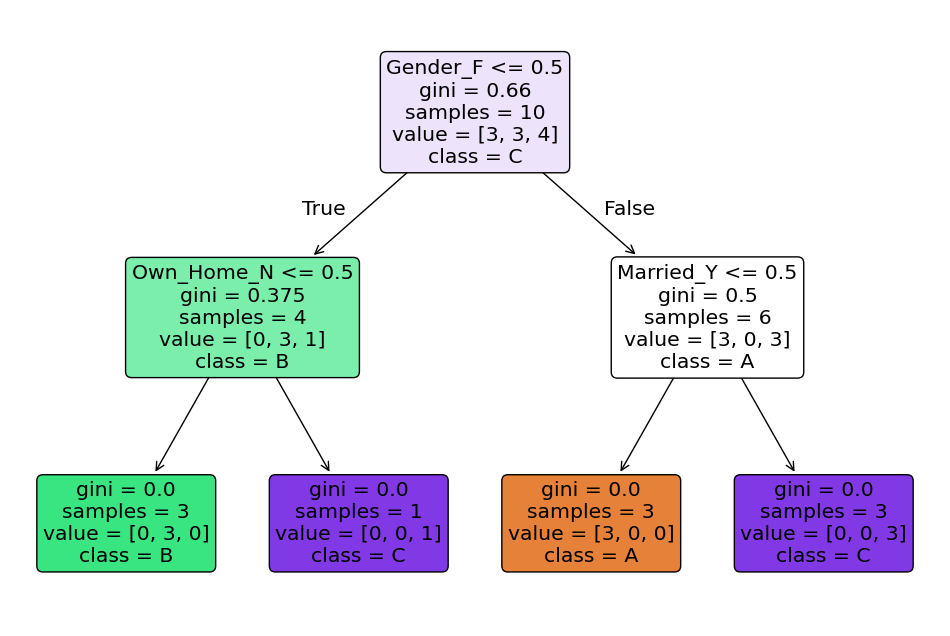

In [ ]:
#CCART TREEE
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Example dataset
data = {'Own_Home': ['Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N'],
        'Married': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N'],
        'Gender': ['M', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M'],
        'Employed': ['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N'],
        'Credit_Rating': ['A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A'],
        'Risk_Class': ['B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A', 'C']}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df[['Own_Home', 'Married', 'Gender', 'Employed', 'Credit_Rating']])

# Separate the features (X) and target (y)
X = df_encoded
y = df['Risk_Class']

# Initialize the Decision Tree Classifier (CART) with the Gini index
cart_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the CART model
cart_model.fit(X, y)

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(cart_model, feature_names=X.columns, class_names=cart_model.classes_, filled=True, rounded=True)
plt.show()
"""
Explanation:
Dataset: The dataset consists of features like Own_Home, Married, Gender, Employed,
Credit_Rating, and the target Risk_Class.
Encoding: Since decision trees cannot handle categorical variables directly,
we use pd.get_dummies() to convert categorical variables into binary (dummy) variables.
Model: We initialize a DecisionTreeClassifier with the criterion set to "gini" (for CART).
Training: We fit the model to the encoded features (X) and the target variable (y).
Visualization: The decision tree is plotted using tree.plot_tree()"""

Predictions for each record in the training dataset:
['B' 'A' 'C' 'B' 'C' 'A' 'B' 'C' 'A' 'C']


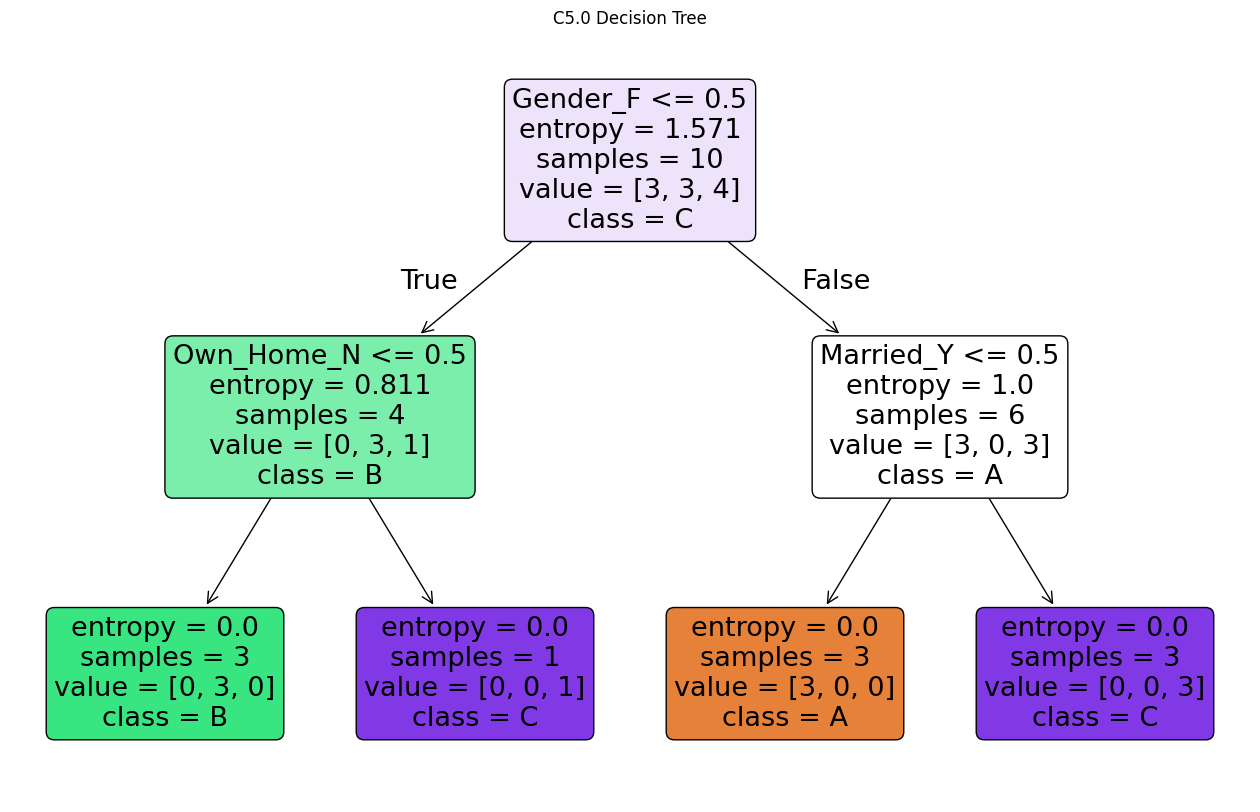

In [ ]:
#  using 5.0 decision Tree

#Explanation of Additional Code:
#Exporting the Tree: The export_graphviz function is used to create a DOT file
#that can be visualized with Graphviz. Make sure to specify the correct path for the output
# file if needed.
#Visualization: The tree is plotted using matplotlib, and the title is set for clarity.
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt

# Example dataset
data = {
    'Own_Home': ['Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N'],
    'Married': ['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N'],
    'Gender': ['M', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M'],
    'Employed': ['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N'],
    'Credit_Rating': ['A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A'],
    'Risk_Class': ['B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A', 'C']
}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df[['Own_Home', 'Married', 'Gender', 'Employed', 'Credit_Rating']])

# Separate the features (X) and target (y)
X = df_encoded
y = df['Risk_Class']

# Initialize the Decision Tree Classifier (C5.0) with entropy as the criterion
c50_model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=42)

# Fit the C5.0 model
c50_model.fit(X, y)

# Predicting the classifications of the training dataset
predictions = c50_model.predict(X)

# Output predictions for each record
print("Predictions for each record in the training dataset:")
print(predictions)

# Visualizing the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(c50_model, feature_names=X.columns, class_names=c50_model.classes_, filled=True, rounded=True)
plt.title("C5.0 Decision Tree")
plt.show()

# Exporting the decision tree to a .dot file
export_graphviz(c50_model, out_file="c50_tree.dot",
                feature_names=X.columns,
                class_names=c50_model.classes_,
                filled=True, rounded=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.92      0.61      0.73        18

    accuracy                           0.73        30
   macro avg       0.76      0.76      0.73        30
weighted avg       0.79      0.73      0.73        30

Accuracy Score: 0.7333333333333333


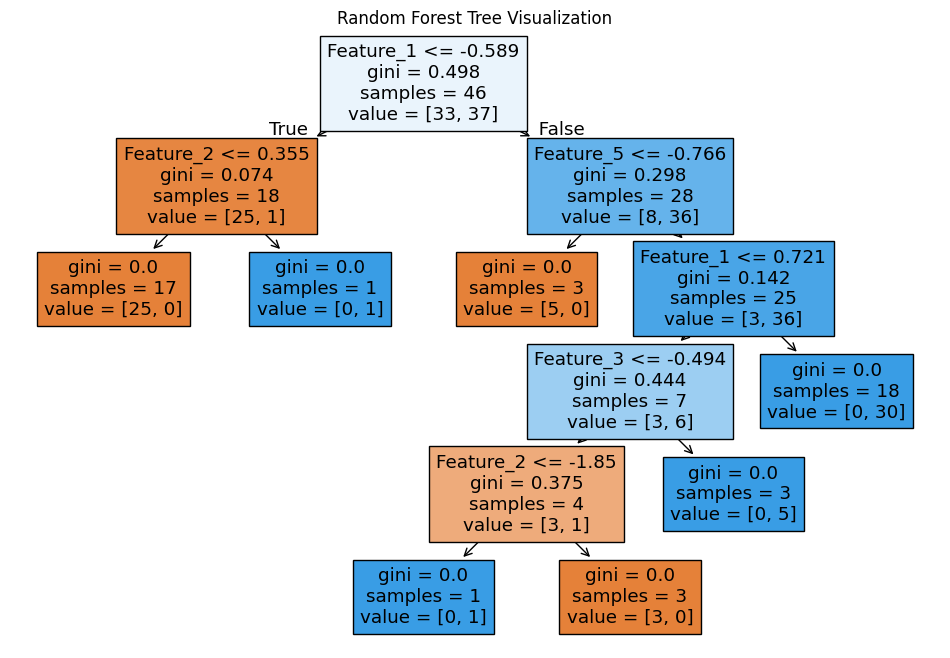

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Creating a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Converting to DataFrame for better visualization (optional)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Visualizing one of the trees in the Random Forest
plt.figure(figsize=(12, 8))
tree_to_plot = rf_model.estimators_[0]  # Get one tree from the forest
tree.plot_tree(tree_to_plot, filled=True, feature_names=[f'Feature_{i+1}' for i in range(X.shape[1])])
plt.title("Random Forest Tree Visualization")
plt.show()